In [1]:
#18/05/21: stripped down version of IBM code for running locally on IBM Qsystem 1
import math
import certifi
# Importing standard Qiskit libraries and configuring account
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy import stats

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer,BasicAer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity




In [2]:
#create folder name for saving in
from datetime import date
import os
import shutil
#date is used for file names later
today = date.today()
today=str(today)
#today=str('simulation')
#name of the quantum computer being used is the foldername and also used in the functions to select the computer
cname='ibmq_ehningen'
ii=complex(0,1)

MSE =  0.019120321278386695
MSE mitigated =  0.010631012163733827
0.015625
0.0126953125
0.0124205078125
0.01171875


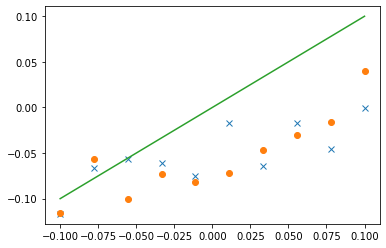

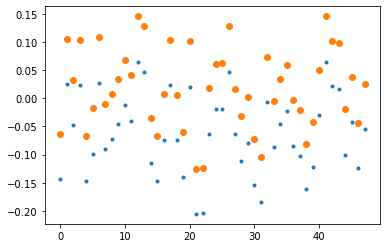

In [4]:
Fx = np.load(str(cname+str("_LR_2022_3Q")+str("/")+str("_3Q_est")+str("/")+str("all_data")+str(".npz")),allow_pickle=True)
Fs = np.load(str(cname+str("_LR_2022_3Q")+str("/")+str("_3Q_est")+str('_take_2_noEM')+str("/")+str("shot_string")+str(".npz")),allow_pickle=True)
#print(Fx)
data_load=Fx['arr_0']
tot_shots=Fs['arr_0']
#print(data_load)
#print(len(data_load))
#in the real thing this is 20,000
shotsEM=20000
#shotsEM=1000
shots_actual=50625
#in the real thing this is 100,000
shotsrun=120000
#shotsrun=1000
shotsper=np.round(512*2/3)
p=0.5
chiX1 = -0.1338;
chiX2 = 0.1338;
chiX3 = -2.4681;
chiX4 = 0.7817;
chiX5 =-0.7817;
chiX6 = 0.7156;
chiX7 =  -0.7156;
chiX8 = 2.4681;


chiY1 = -2.4680;
chiY2 =  2.4680;
chiY3 =0.1338;
chiY4 = 0.7157
chiY5 =-0.7157;
chiY6 = -0.7819;
chiY7 =  0.7819;
chiY8 = -0.1338;

#first load the error mitigation
thvec=np.linspace(-0.1,0.1,10)
estx_mit=[]
esty_mit=[]

counts_per_run=[]

scaling_prob_vec2=[]

for jj in range(10):
    data_int=data_load[jj*27:27+jj*27]
    shots_int=tot_shots[jj*27:27+jj*27]
    #then load all the counts
    count000=0
    count010=0
    count100=0
    count110=0
    count001=0
    count011=0
    count101=0
    count111=0
    scaling_prob_vec=[]
    for kk in range(27):
        
        #need a vector with the appropriate number of each measurement outcome for this particular circuit
        #then we will discard a certain amount to only leave #shots_int[kk] in total
        n000=data_int[kk].get('000',0)
        n010=data_int[kk].get('010',0)
        n100=data_int[kk].get('100',0)
        n110=data_int[kk].get('110',0)
        n001=data_int[kk].get('001',0)
        n011=data_int[kk].get('011',0)
        n101=data_int[kk].get('101',0)
        n111=data_int[kk].get('111',0)
        
        #then make the vector
        
        data1=np.ones(shots_actual)
        data1[:int(n000)] = 0
        data1[int(n000):int(n000)+int(n010)] = 1
        data1[int(n000)+int(n010):int(n000)+int(n010)+int(n100)] = 2
        data1[int(n000)+int(n010)+int(n100):int(n000)+int(n010)+int(n100)+int(n110)] = 3
        data1[int(n000)+int(n010)+int(n100)+int(n110):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)] = 4
        data1[int(n000)+int(n010)+int(n100)+int(n110)+int(n001):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)] = 5
        data1[int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)+int(n101)] = 6
        data1[int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)+int(n101):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)+int(n101)+int(n111)] = 7
        np.random.shuffle(data1)
        #only want this much data
        dataint=data1[0:shots_int[kk]]
        
        count000=count000+np.count_nonzero(dataint==0)
        count010=count010+np.count_nonzero(dataint==1)
        count100=count100+np.count_nonzero(dataint==2)
        count110=count110+np.count_nonzero(dataint==3)
        count001=count001+np.count_nonzero(dataint==4)
        count011=count011+np.count_nonzero(dataint==5)
        count101=count101+np.count_nonzero(dataint==6)
        count111=count111+np.count_nonzero(dataint==7)
        
        countsint=np.count_nonzero(dataint==0)+np.count_nonzero(dataint==1)+np.count_nonzero(dataint==2)+np.count_nonzero(dataint==3)+np.count_nonzero(dataint==4)+np.count_nonzero(dataint==5)+np.count_nonzero(dataint==6)+np.count_nonzero(dataint==7)
        if countsint !=shots_int[kk]:
            print("\033[1;31;40m  Error, something not right with counts    ")
    
    n1=count000
    n2=count001
    n3=count010
    n4=count011
    n5=count100
    n6=count101
    n7=count110
    n8=count111
    
    
    estx=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4+chiX5*n5+chiX6*n6+chiX7*n7+chiX8*n8)*(1/shotsEM)
    esty=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4+chiY5*n5+chiY6*n6+chiY7*n7+chiY8*n8)*(1/shotsEM)
    
    
    estx_mit.append(estx)
    esty_mit.append(esty)
    
    #just saving the last loaded point for loading rest of data belo
    endpt=27+jj*27
    
plt.plot(thvec,estx_mit,'x')
plt.plot(thvec,esty_mit,'o')
plt.plot(thvec,thvec)
   
    
res3QXalt = stats.linregress(np.array(estx_mit),np.array(thvec))
res3QYalt = stats.linregress(np.array(esty_mit),np.array(thvec))

#first collect all the data in one

count000=0
count010=0
count100=0
count110=0
count001=0
count011=0
count101=0
count111=0
for kk in range(3):
    
    data_int=data_load[endpt+8*kk:endpt+8+8*kk]
    shots_int=tot_shots[endpt+8*kk:endpt+8+8*kk]
    
    scaling_prob_vec=[]
    for kk in range(8):
#         scaling_prob=shots_int[kk]/shotsrun
#         scaling_prob_vec.append(scaling_prob)

        n000=data_int[kk].get('000',0)
        n010=data_int[kk].get('010',0)
        n100=data_int[kk].get('100',0)
        n110=data_int[kk].get('110',0)
        n001=data_int[kk].get('001',0)
        n011=data_int[kk].get('011',0)
        n101=data_int[kk].get('101',0)
        n111=data_int[kk].get('111',0)
        
        #then make the vector
        
        data1=np.ones(shots_actual)
        data1[:int(n000)] = 0
        data1[int(n000):int(n000)+int(n010)] = 1
        data1[int(n000)+int(n010):int(n000)+int(n010)+int(n100)] = 2
        data1[int(n000)+int(n010)+int(n100):int(n000)+int(n010)+int(n100)+int(n110)] = 3
        data1[int(n000)+int(n010)+int(n100)+int(n110):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)] = 4
        data1[int(n000)+int(n010)+int(n100)+int(n110)+int(n001):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)] = 5
        data1[int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)+int(n101)] = 6
        data1[int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)+int(n101):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)+int(n101)+int(n111)] = 7
        np.random.shuffle(data1)
        #only want this much data
        dataint=data1[0:shots_int[kk]]
        
        count000=count000+np.count_nonzero(dataint==0)
        count010=count010+np.count_nonzero(dataint==1)
        count100=count100+np.count_nonzero(dataint==2)
        count110=count110+np.count_nonzero(dataint==3)
        count001=count001+np.count_nonzero(dataint==4)
        count011=count011+np.count_nonzero(dataint==5)
        count101=count101+np.count_nonzero(dataint==6)
        count111=count111+np.count_nonzero(dataint==7)
        
        countsint=np.count_nonzero(dataint==0)+np.count_nonzero(dataint==1)+np.count_nonzero(dataint==2)+np.count_nonzero(dataint==3)+np.count_nonzero(dataint==4)+np.count_nonzero(dataint==5)+np.count_nonzero(dataint==6)+np.count_nonzero(dataint==7)
        if countsint !=shots_int[kk]:
            print("\033[1;31;40m  Error, something not right with EM counts   ")
            
        if n000+n100+n010+n110+n001+n101+n011+n111 != shots_actual:
            print("\033[1;31;40m  Error, something not right with EM counts   ")

            
            
totcounts=  count000+count010+count100+count110+ count001+ count011+count101+count111
#now make a vector of all the data
n000=count000
n010=count010
n100=count100
n110=count110
n001=count001
n011=count011
n101=count101
n111=count111

data1=np.ones(totcounts)
data1[:int(n000)] = 0
data1[int(n000):int(n000)+int(n010)] = 1
data1[int(n000)+int(n010):int(n000)+int(n010)+int(n100)] = 2
data1[int(n000)+int(n010)+int(n100):int(n000)+int(n010)+int(n100)+int(n110)] = 3
data1[int(n000)+int(n010)+int(n100)+int(n110):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)] = 4
data1[int(n000)+int(n010)+int(n100)+int(n110)+int(n001):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)] = 5
data1[int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)+int(n101)] = 6
data1[int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)+int(n101):int(n000)+int(n010)+int(n100)+int(n110)+int(n001)+int(n011)+int(n101)+int(n111)] = 7
np.random.shuffle(data1)


estxvec=[]
estyvec=[]
msevec=[]

estxvecEM=[]
estyvecEM=[]
msevecEM=[]
for kk in range(int(np.round(totcounts/shotsper))-1):
    
    dataint=data1[int(shotsper*kk):int((kk+1)*shotsper)]
    
    count000=np.count_nonzero(dataint==0)
    count010=np.count_nonzero(dataint==1)
    count100=np.count_nonzero(dataint==2)
    count110=np.count_nonzero(dataint==3)
    count001=np.count_nonzero(dataint==4)
    count011=np.count_nonzero(dataint==5)
    count101=np.count_nonzero(dataint==6)
    count111=np.count_nonzero(dataint==7)
        
    n1=count000
    n2=count001
    n3=count010
    n4=count011
    n5=count100
    n6=count101
    n7=count110
    n8=count111

    countsint=n1+n2+n3+n4+n5+n6+n7+n8
    if countsint !=shotsper:
        print("\033[1;31;40m  Error, something not right with counts   ")
        print(countsint)

    estx=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4+chiX5*n5+chiX6*n6+chiX7*n7+chiX8*n8)*(1/shotsper)
    esty=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4+chiY5*n5+chiY6*n6+chiY7*n7+chiY8*n8)*(1/shotsper)
    
    estxEM=estx+res3QXalt.intercept
    estyEM=esty+res3QYalt.intercept
    estxvec.append(estx)
    estyvec.append(esty)
    msevec.append(estx**2+esty**2)
    
    estxvecEM.append(estxEM)
    estyvecEM.append(estyEM)
    msevecEM.append(estxEM**2+estyEM**2)
# print(estxvec);
# print(estyvec);

print('MSE = ',np.mean(msevec))
print('MSE mitigated = ',np.mean(msevecEM))


shotseff=512
expvar3Q=12.7186/shotseff;

expvar=1/(((1-p)**2)*shotseff);
expvar2Q=2*(2-p+0.5*p**2)/(((1-p)**2)*shotseff);

hol=(4-2*p)/((1-p)**2*shotseff)
print(expvar*2)
print(expvar2Q/2)
print(expvar3Q/2)
print(hol/2)

plt.figure(2)
plt.plot(estxvec,'.')
plt.plot(estxvecEM,'o')